In [34]:
from keras.layers import Input, Dense, Reshape
from keras.models import Model
import matplotlib.pyplot as plt

In [35]:
class ANN_autoencoder:
    @staticmethod
    
    # latentDim: The number of neurons in our fully-connected (Dense) latent vector. By default, if this parameter is not passed, the value is set to 16.
    
    def build(latentDim):

        # this is the size of our encoded representations
        encoding_dim = int(latentDim / 12.5)
        
        # this is our input placeholder
        input_img = Input(shape = (latentDim,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation = 'relu')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(latentDim, activation = 'linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input = input_img, output = decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input = input_img, output = encoded)

        encoded_input = Input(shape = (encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input = encoded_input, output = decoder_layer(encoded_input))
        
        # return a 3-tuple of the encoder, decoder, and autoencoder
        return (encoder, decoder, autoencoder)

In [36]:
import numpy as np

X_quantized = np.loadtxt('datasets/Quantized_100.csv')
X_quantized_20 = np.loadtxt('datasets/Quantized_20.csv')
X_sampled = np.loadtxt('datasets/Sampled_100.csv')
X_sampled_20 = np.loadtxt('datasets/Sampled_20.csv')

print(X_quantized.shape, X_quantized_20.shape, X_sampled.shape, X_sampled_20.shape)

(2282, 400) (2282, 80) (2282, 400) (2282, 80)


In [37]:
# splitting
train_size = int(len(X_quantized) * 0.80)
test_size = len(X_quantized)-train_size
X_train, X_test = X_quantized[0:train_size, :], X_quantized[train_size:len(X_quantized), :]

In [38]:
# Extraction de sous-data frame, pour chaque jeu et chaque variable

# Quantized
heading_quantized = X_quantized[:, 0:X_quantized.shape[1]:4]
speed_quantized = X_quantized[:, 1:X_quantized.shape[1]:4]
acceleration_quantized = X_quantized[:, 2:X_quantized.shape[1]:4]
yawrate_quantized = X_quantized[:, 3:X_quantized.shape[1]:4]

heading_quantized_train, heading_quantized_test = heading_quantized[0:int(len(heading_quantized)*0.80),:], heading_quantized[int(len(heading_quantized)*0.80):len(heading_quantized),:]
speed_quantized_train, speed_quantized_test = speed_quantized[0:int(len(speed_quantized)*0.80),:], speed_quantized[int(len(speed_quantized)*0.80):len(speed_quantized),:]
acceleration_quantized_train, acceleration_quantized_test = acceleration_quantized[0:int(len(acceleration_quantized)*0.80),:], acceleration_quantized[int(len(acceleration_quantized)*0.80):len(acceleration_quantized),:]
yawrate_quantized_train, yawrate_quantized_test = yawrate_quantized[0:int(len(yawrate_quantized)*0.80),:], yawrate_quantized[int(len(yawrate_quantized)*0.80):len(yawrate_quantized),:]

# Quantized_20
heading_quantized_20 = X_quantized_20[:, 0:X_quantized_20.shape[1]:4]
speed_quantized_20 = X_quantized_20[:, 1:X_quantized_20.shape[1]:4]
acceleration_quantized_20 = X_quantized_20[:, 2:X_quantized_20.shape[1]:4]
yawrate_quantized_20 = X_quantized_20[:, 3:X_quantized_20.shape[1]:4]

heading_quantized_20_train, heading_quantized_20_test = heading_quantized_20[0:int(len(heading_quantized_20)*0.80),:], heading_quantized_20[int(len(heading_quantized_20)*0.80):len(heading_quantized_20),:]
speed_quantized_20_train, speed_quantized_20_test = speed_quantized_20[0:int(len(speed_quantized_20)*0.80),:], speed_quantized_20[int(len(speed_quantized_20)*0.80):len(speed_quantized_20),:]
acceleration_quantized_20_train, acceleration_quantized_20_test = acceleration_quantized_20[0:int(len(acceleration_quantized_20)*0.80),:], acceleration_quantized_20[int(len(acceleration_quantized_20)*0.80):len(acceleration_quantized_20),:]
yawrate_quantized_20_train, yawrate_quantized_20_test = yawrate_quantized_20[0:int(len(yawrate_quantized_20)*0.80),:], yawrate_quantized_20[int(len(yawrate_quantized_20)*0.80):len(yawrate_quantized_20),:]


# Sampled
heading_sampled = X_sampled[:, 0:X_sampled.shape[1]:4]
speed_sampled = X_sampled[:, 1:X_sampled.shape[1]:4]
acceleration_sampled = X_sampled[:, 2:X_sampled.shape[1]:4]
yawrate_sampled = X_sampled[:, 3:X_sampled.shape[1]:4]


heading_sampled_train, heading_sampled_test = heading_sampled[0:int(len(heading_sampled)*0.80),:], heading_sampled[int(len(heading_sampled)*0.80):len(heading_sampled),:]
speed_sampled_train, speed_sampled_test = speed_sampled[0:int(len(speed_sampled)*0.80),:], speed_sampled[int(len(speed_sampled)*0.80):len(speed_sampled),:]
acceleration_sampled_train, acceleration_sampled_test = acceleration_sampled[0:int(len(acceleration_sampled)*0.80),:], acceleration_sampled[int(len(acceleration_sampled)*0.80):len(acceleration_sampled),:]
yawrate_sampled_train, yawrate_sampled_test = yawrate_sampled[0:int(len(yawrate_sampled)*0.80),:], yawrate_sampled[int(len(yawrate_sampled)*0.80):len(yawrate_sampled),:]

# Sampled_20
heading_sampled_20 = X_sampled_20[:, 0:X_sampled_20.shape[1]:4]
speed_sampled_20 = X_sampled_20[:, 1:X_sampled_20.shape[1]:4]
acceleration_sampled_20 = X_sampled_20[:, 2:X_sampled_20.shape[1]:4]
yawrate_sampled_20 = X_sampled_20[:, 3:X_sampled_20.shape[1]:4]

heading_sampled_20_train, heading_sampled_20_test = heading_sampled_20[0:int(len(heading_sampled_20)*0.80),:], heading_sampled_20[int(len(heading_sampled_20)*0.80):len(heading_sampled_20),:]
speed_sampled_20_train, speed_sampled_20_test = speed_sampled_20[0:int(len(speed_sampled_20)*0.80),:], speed_sampled_20[int(len(speed_sampled_20)*0.80):len(speed_sampled_20),:]
acceleration_sampled_20_train, acceleration_sampled_20_test = acceleration_sampled_20[0:int(len(acceleration_sampled_20)*0.80),:], acceleration_sampled_20[int(len(acceleration_sampled_20)*0.80):len(acceleration_sampled_20),:]
yawrate_sampled_20_train, yawrate_sampled_20_test = yawrate_sampled_20[0:int(len(yawrate_sampled_20)*0.80),:], yawrate_sampled_20[int(len(yawrate_sampled_20)*0.80):len(yawrate_sampled_20),:]

In [39]:
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [40]:
(encoder, decoder, autoencoder) = ANN_autoencoder.build(400)
autoencoder.compile(optimizer = 'adam', loss = 'mse')

C:\Users\Hapoc\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Hapoc\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
C:\Users\Hapoc\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


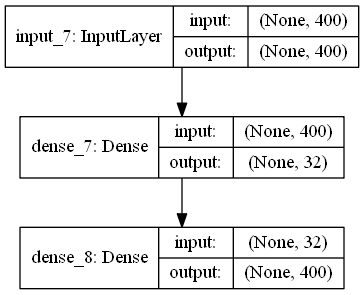

In [41]:
from keras.utils import plot_model
plot_model(autoencoder, to_file = 'autoencoder_ann.png', show_shapes = True, show_layer_names = True)

In [42]:
H = autoencoder.fit(X_train, X_train, epochs = 200,
                    batch_size = 64, shuffle = True,
                    verbose = 1, validation_data = (X_test, X_test))

Train on 1825 samples, validate on 457 samples
Epoch 1/200
1825/1825 [==============================] - 0s 144us/step - loss: 0.0016 - val_loss: 7.0562e-04
Epoch 2/200
1825/1825 [==============================] - 0s 66us/step - loss: 5.8341e-04 - val_loss: 5.1229e-04
Epoch 3/200
1825/1825 [==============================] - 0s 54us/step - loss: 5.0882e-04 - val_loss: 4.7896e-04
Epoch 4/200
1825/1825 [==============================] - 0s 56us/step - loss: 4.6995e-04 - val_loss: 4.3050e-04
Epoch 5/200
1825/1825 [==============================] - 0s 60us/step - loss: 4.1760e-04 - val_loss: 3.8674e-04
Epoch 6/200
1825/1825 [==============================] - 0s 60us/step - loss: 3.8331e-04 - val_loss: 3.5940e-04
Epoch 7/200
1825/1825 [==============================] - 0s 57us/step - loss: 3.5568e-04 - val_loss: 3.3102e-04
Epoch 8/200
1825/1825 [==============================] - 0s 54us/step - loss: 3.2673e-04 - val_loss: 3.0377e-04
Epoch 9/200
1825/1825 [==============================] - 0s 

1825/1825 [==============================] - 0s 58us/step - loss: 8.6480e-05 - val_loss: 8.7031e-05
Epoch 146/200
1825/1825 [==============================] - 0s 55us/step - loss: 8.6792e-05 - val_loss: 8.6885e-05
Epoch 147/200
1825/1825 [==============================] - 0s 54us/step - loss: 8.6480e-05 - val_loss: 8.6048e-05
Epoch 148/200
1825/1825 [==============================] - 0s 56us/step - loss: 8.6567e-05 - val_loss: 8.6803e-05
Epoch 149/200
1825/1825 [==============================] - 0s 55us/step - loss: 8.6335e-05 - val_loss: 8.6504e-05
Epoch 150/200
1825/1825 [==============================] - 0s 52us/step - loss: 8.6212e-05 - val_loss: 8.6130e-05
Epoch 151/200
1825/1825 [==============================] - 0s 55us/step - loss: 8.5912e-05 - val_loss: 8.5829e-05
Epoch 152/200
1825/1825 [==============================] - 0s 53us/step - loss: 8.6309e-05 - val_loss: 8.6107e-05
Epoch 153/200
1825/1825 [==============================] - 0s 54us/step - loss: 8.6047e-05 - val_loss:

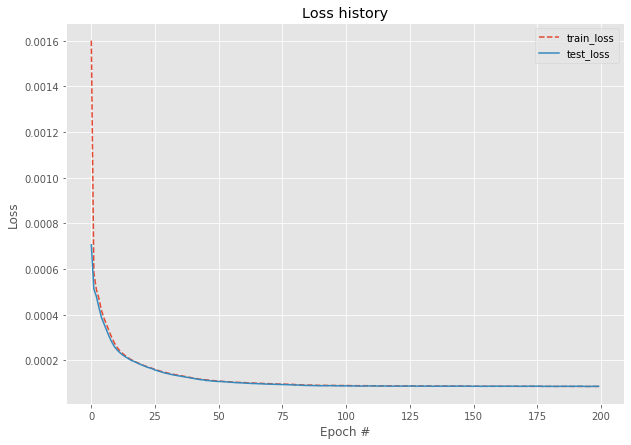

In [43]:
# loss visualization
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure(figsize=(10, 7))
plt.plot(N, H.history["loss"], '--', label="train_loss")
plt.plot(N, H.history["val_loss"], label="test_loss")
plt.title("Loss history")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

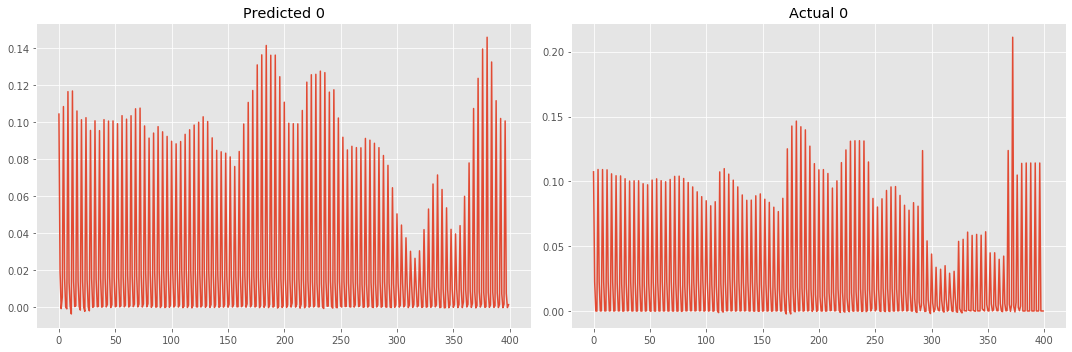

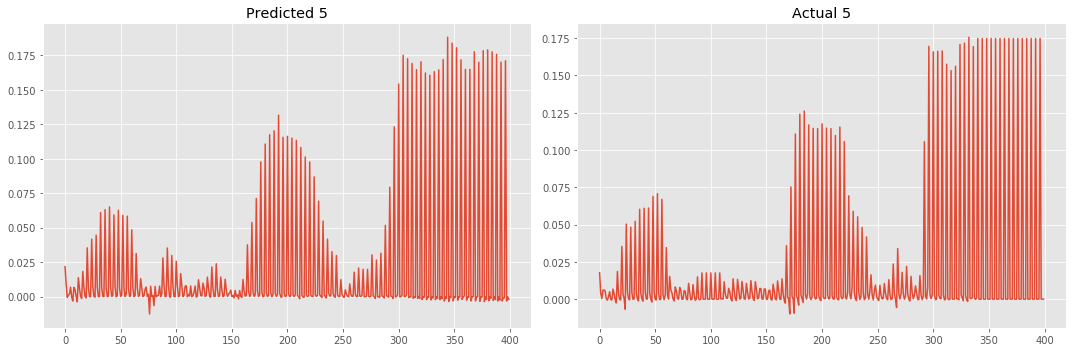

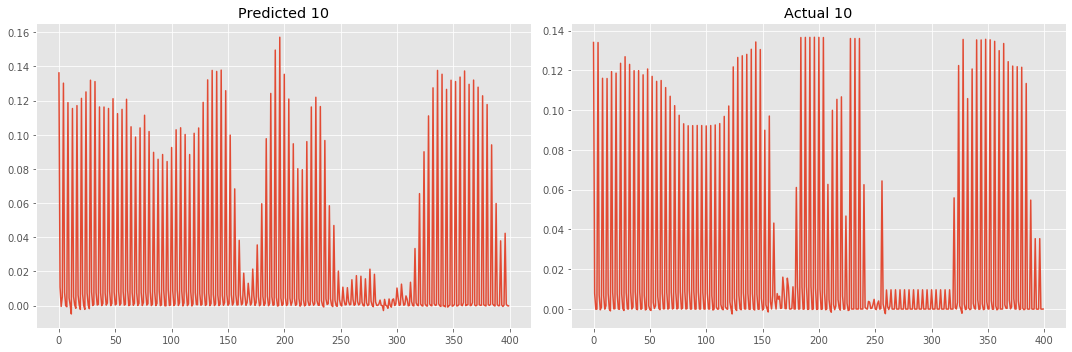

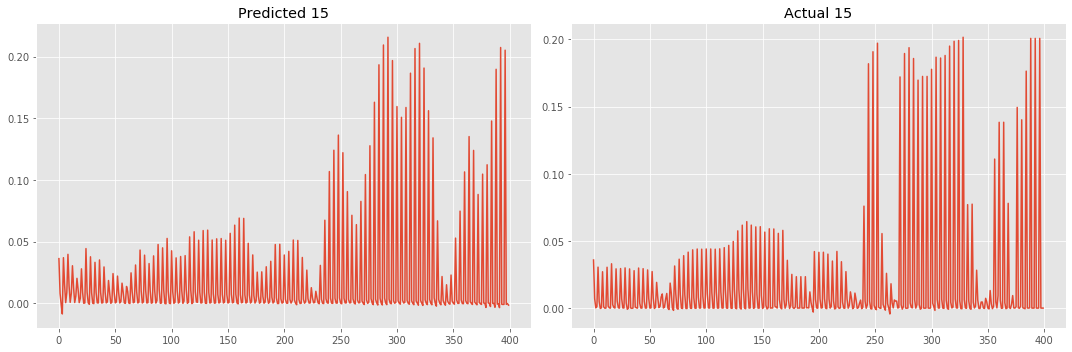

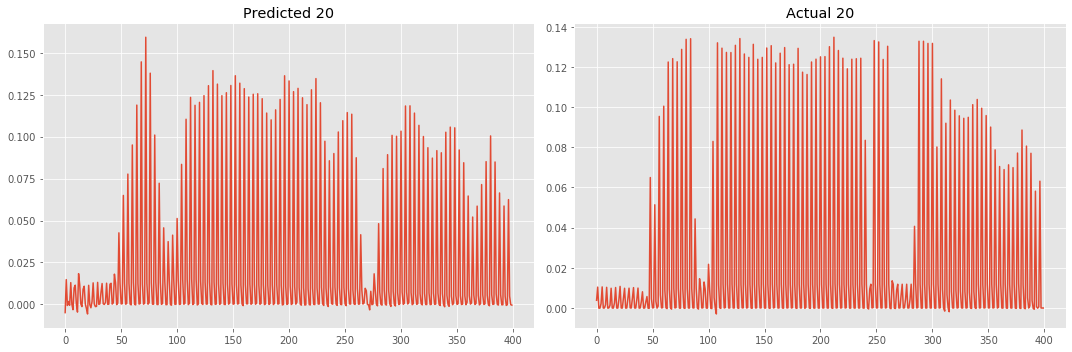

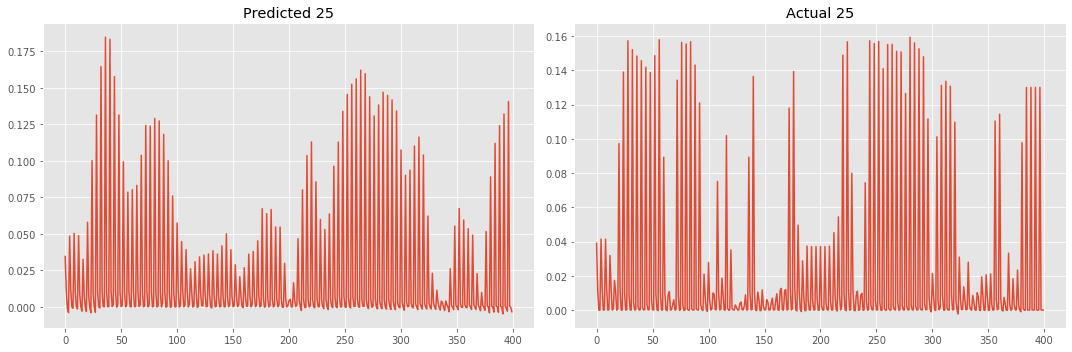

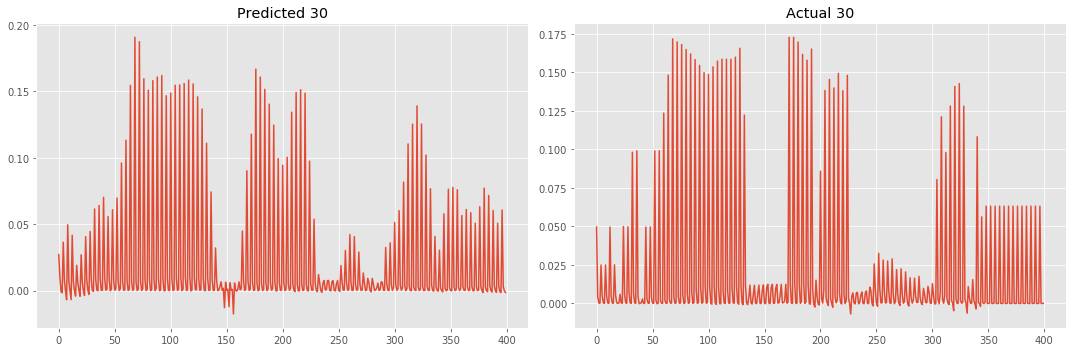

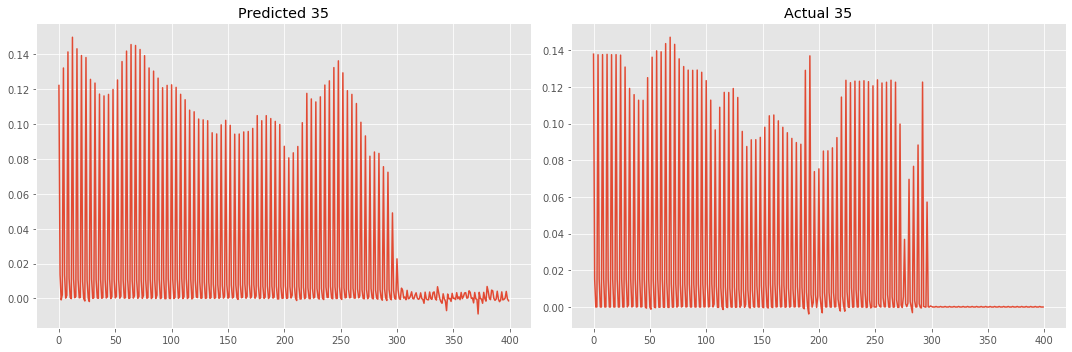

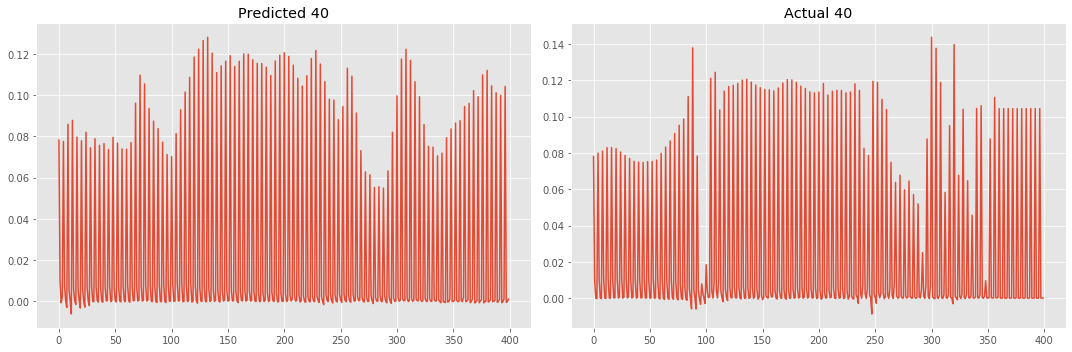

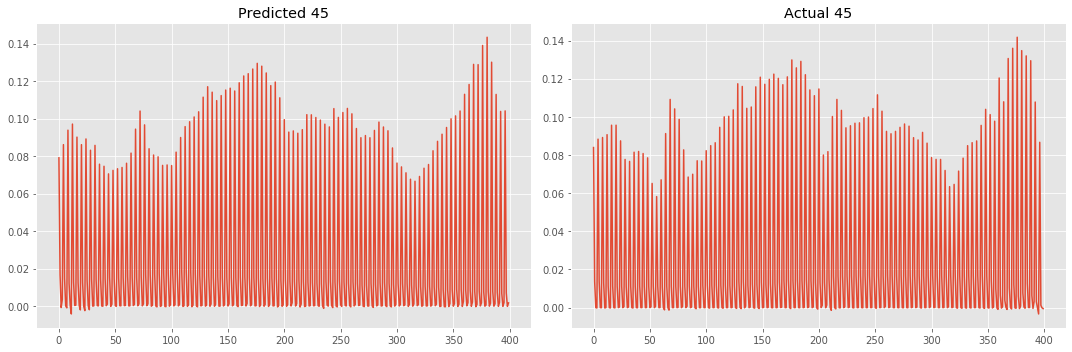

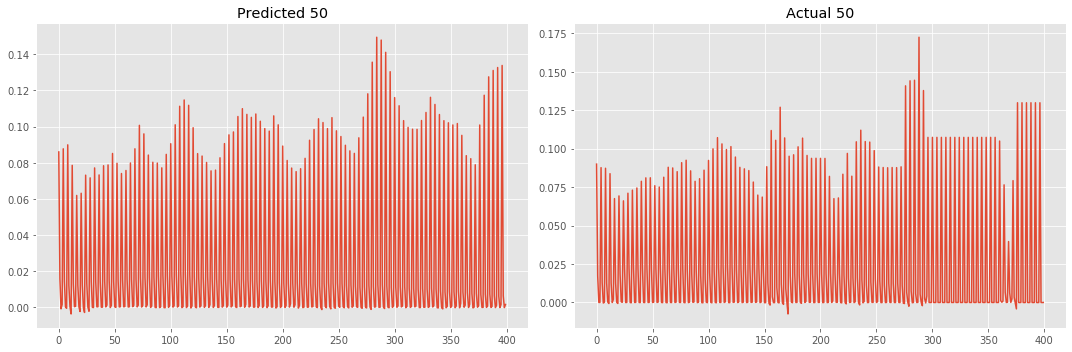

In [44]:
# predictions
decoded_imgs = autoencoder.predict(X_test)

# plot
plt.style.use("ggplot")

for i in range(0, 51, 5):

    fig, ax = plt.subplots(1, 2, figsize = (15, 5))

    ax[0].set_title('Predicted ' + str(i))
    ax[0].plot(decoded_imgs[i, :])
    ax[1].set_title('Actual ' + str(i))
    ax[1].plot(X_test[i, :])

    fig.tight_layout()